Topic: Challenge Set **1** <br> Subject: Explore MTA turnstile data <br> Date: 09/18/2017 <br> Name: Kenny Leung <br> Worked with: -- <br>Location: sf17_ds8/student_submissions/challenges/01-mta/leung_kenny/challenge_set_1_kenny.ipynb

In [2]:
import sys
print("Python Version:", sys.version)

Python Version: 3.6.1 |Anaconda custom (x86_64)| (default, May 11 2017, 13:04:09) 
[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]


In [3]:
#import libraries
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
import dateutil.parser
import datetime as dt

%matplotlib inline

In [4]:
sns.set_style('whitegrid')

### Challenge 1

In [4]:
#create dictionary with keys and values from csv file
f = open('turnstile_091617.csv', 'r')

keys = []
values = []
    
csv_f = csv.reader(f)

#key is the first four columns of each row, values are the rest
for row in csv_f:
    key = str(row[0]),str(row[1]),str(row[2]),str(row[3])
    value = [row[4], row[5], row[6], row[7], row[8], row[9], row[10]]
    
    stripped_value = [j.strip() for j in value]
    
    keys.append(key)
    values.append(stripped_value)

#remove the first item of the list (column names)
keys.pop(0)
values.pop(0)
f.close()

#create a dictionary that groups values with the same key using defaultdict
s = zip(keys, values)
d = defaultdict(list)
for k, v in s:
    d[k].append(v)

**TA COMMENT:**

Good job on doing this part with just python data structures. One small improvement would be to create the dictionary in one step (d = dict(zip(keys,values)))

In [5]:
d['A002', 'R051', '02-00-00', '59 ST']

[['NQR456W',
  'BMT',
  '09/09/2017',
  '00:00:00',
  'REGULAR',
  '0006318862',
  '0002138544'],
 ['NQR456W',
  'BMT',
  '09/09/2017',
  '04:00:00',
  'REGULAR',
  '0006318888',
  '0002138549'],
 ['NQR456W',
  'BMT',
  '09/09/2017',
  '08:00:00',
  'REGULAR',
  '0006318905',
  '0002138584'],
 ['NQR456W',
  'BMT',
  '09/09/2017',
  '12:00:00',
  'REGULAR',
  '0006318985',
  '0002138669'],
 ['NQR456W',
  'BMT',
  '09/09/2017',
  '16:00:00',
  'REGULAR',
  '0006319212',
  '0002138731'],
 ['NQR456W',
  'BMT',
  '09/09/2017',
  '20:00:00',
  'REGULAR',
  '0006319491',
  '0002138779'],
 ['NQR456W',
  'BMT',
  '09/10/2017',
  '00:00:00',
  'REGULAR',
  '0006319633',
  '0002138801'],
 ['NQR456W',
  'BMT',
  '09/10/2017',
  '04:00:00',
  'REGULAR',
  '0006319649',
  '0002138805'],
 ['NQR456W',
  'BMT',
  '09/10/2017',
  '08:00:00',
  'REGULAR',
  '0006319661',
  '0002138821'],
 ['NQR456W',
  'BMT',
  '09/10/2017',
  '12:00:00',
  'REGULAR',
  '0006319759',
  '0002138889'],
 ['NQR456W',
  'BMT'

### Challenge 2

In [6]:
#read text data using pandas
df = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_170916.txt')

In [7]:
#create columns for keys, create datetime objects column, create delta entries column for entries in a block of time
df['KEYS'] = df['C/A']+', '+df['UNIT']+', '+df['SCP']+', '+df['STATION']
df['DATE & TIME'] = df['DATE']+' '+df['TIME']
df['DATETIME'] = df['DATE & TIME'].apply(dateutil.parser.parse)

In [8]:
#clean column names by striping whitespace
df = df.rename(columns=lambda x: x.strip())

In [9]:
#create delta entries and exits colummns
df['DELTA ENTRIES'] = df['ENTRIES'].diff().shift(-1)
df['DELTA EXITS'] = df['EXITS'].diff().shift(-1)

In [10]:
#filter out columns where keys value is not equal to keys value to the row below it
df2 = df[df['KEYS'] == df['KEYS'].shift(-1)]

In [11]:
#filter out entries and exits between 0 and 10000
df2b = df2[(df2['DELTA ENTRIES'] > 0) & (df2['DELTA EXITS'] > 0) & (df2['DELTA ENTRIES'] < 10000) & (df2['DELTA EXITS'] < 10000)]

In [12]:
#create new dataframe grouped by keys and datetime
df2c = df2b \
.groupby(['KEYS','DATETIME']).sum() \
.drop(['ENTRIES','EXITS'],axis=1)

In [13]:
df2c.head()

DELTA ENTRIES  DELTA EXITS
KEYS                        DATETIME                                       
A002, R051, 02-00-00, 59 ST 2017-09-09 00:00:00           26.0          5.0
                            2017-09-09 04:00:00           17.0         35.0
                            2017-09-09 08:00:00           80.0         85.0
                            2017-09-09 12:00:00          227.0         62.0
                            2017-09-09 16:00:00          279.0         48.0

### Challenge 3

n is 4 hours.

In [14]:
#create new dataframe grouped by keys and date
df3 = df2b \
.groupby(['KEYS','DATE']).sum() \
.drop(['ENTRIES','EXITS'],axis=1)

In [15]:
df3.head()

DELTA ENTRIES  DELTA EXITS
KEYS                        DATE                                  
A002, R051, 02-00-00, 59 ST 09/09/2017          771.0        257.0
                            09/10/2017          627.0        195.0
                            09/11/2017         1761.0        494.0
                            09/12/2017         1725.0        493.0
                            09/13/2017         1545.0        537.0

In [16]:
#index with the most delta entries
df3['DELTA ENTRIES'].idxmax()

('R240, R047, 00-03-08, GRD CNTRL-42 ST', '09/13/2017')

### Challenge 4

In [17]:
#create new dataframe for 'R240, R047, 00-03-08, GRD CNTRL-42 ST' grouped by date
df4 = df2b[df2b['KEYS']=='R240, R047, 00-03-08, GRD CNTRL-42 ST'] \
.groupby('DATE').sum() \
.drop(['ENTRIES','EXITS'],axis=1)

In [18]:
df4.head()

,DELTA ENTRIES,DELTA EXITS
DATE,,
09/09/2017,3417.0,1208.0
09/10/2017,2648.0,894.0
09/11/2017,8737.0,1178.0
09/12/2017,9149.0,1235.0
09/13/2017,9150.0,1372.0


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

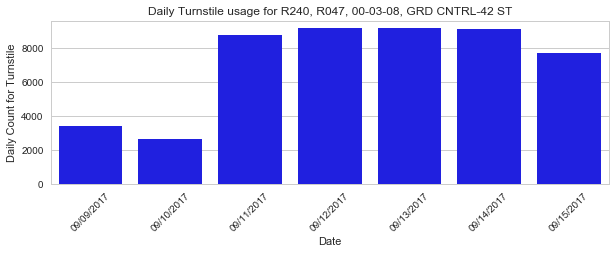

In [19]:
#plot by date and entries
plt.figure(figsize=(10,3))
fig = sns.barplot(x=df4.index.values, y="DELTA ENTRIES", data=df4, color='blue')
plt.title('Daily Turnstile usage for R240, R047, 00-03-08, GRD CNTRL-42 ST') 
plt.xlabel('Date')
plt.ylabel('Daily Count for Turnstile')

plt.xticks(rotation=45)

### Challenge 5

In [28]:
#create new column with control area/unit/station combo
df2b['ControlArea/Unit/Station'] = df2b['C/A']+', '+df2b['UNIT']+', '+df2b['STATION']

/Users/kennyleung/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [29]:
#create new dataframe grouped by combo and date
df5 = df2b \
.groupby(['ControlArea/Unit/Station','DATE']).sum() \
.drop(['ENTRIES','EXITS'],axis=1)

In [30]:
df5.head()

DELTA ENTRIES  DELTA EXITS
ControlArea/Unit/Station DATE                                  
A002, R051, 59 ST        09/09/2017         7745.0       4404.0
                         09/10/2017         6008.0       3594.0
                         09/11/2017        13511.0       8360.0
                         09/12/2017        14021.0       8663.0
                         09/13/2017        13771.0       8227.0

In [73]:
#index with the most entries
df5['DELTA ENTRIES'].idxmax()

('PTH22, R540, PATH NEW WTC', '09/12/2017')

### Challenge 6

In [129]:
#create new dataframe grouped by station and date
df6 = df2b \
.groupby(['STATION','DATE']).sum() \
.drop(['ENTRIES','EXITS'],axis=1)

In [75]:
df6.head()

DELTA ENTRIES  DELTA EXITS
STATION DATE                                  
1 AV    09/09/2017        18981.0      20258.0
        09/10/2017        14342.0      15638.0
        09/11/2017        21838.0      22648.0
        09/12/2017        22599.0      23118.0
        09/13/2017        23254.0      23695.0

In [76]:
#index with the most entries
df6['DELTA ENTRIES'].idxmax()

('34 ST-PENN STA', '09/14/2017')

### Challenge 7

In [108]:
#create new dataframe for '34 ST-PENN STA' grouped by date and summed
df7 = df2[df2['STATION']=='34 ST-PENN STA'] \
.groupby('DATE').sum() \
.drop(['ENTRIES','EXITS'],axis=1)

In [109]:
df7.head()

,DELTA ENTRIES,DELTA EXITS
DATE,,
09/09/2017,88976.0,89154.0
09/10/2017,78718.0,68470.0
09/11/2017,168016.0,137670.0
09/12/2017,171651.0,144675.0
09/13/2017,170323.0,144851.0


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

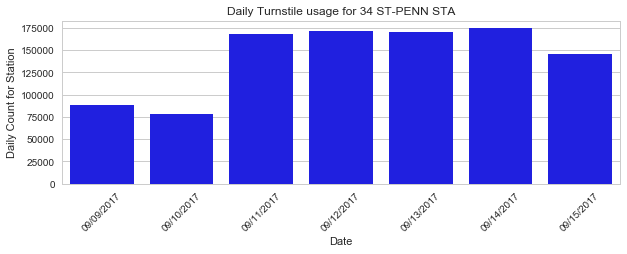

In [137]:
#plot by date and entries
plt.figure(figsize=(10,3))
fig = sns.barplot(x=df7.index.values, y="DELTA ENTRIES", data=df7, color='blue')
plt.title('Daily Turnstile usage for 34 ST-PENN STA') 
plt.xlabel('Date')
plt.ylabel('Daily Count for Station')

plt.xticks(rotation=45)

### Challenge 8

In [7]:
u = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_170916.txt')

v = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_170909.txt')

w = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_170902.txt')

x = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_170826.txt')

y = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_170819.txt')

z = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_170812.txt')

**TA COMMENT:**

If you find yourself repeating code in this way, try using a loop instead.

In [8]:
frames = [u,v,w,x,y,z]

In [9]:
df8 = pd.concat(frames)
df8 = df8.reset_index(drop=True)

In [10]:
#clean column names by striping white space
df8 = df8.rename(columns=lambda x: x.strip())

In [11]:
df8['KEYS'] = df8['C/A']+', '+df8['UNIT']+', '+df8['SCP']+', '+df8['STATION']
df8['DATE & TIME'] = df8['DATE']+' '+df8['TIME']
df8['DELTA ENTRIES'] = df8['ENTRIES'].diff().shift(-1)
df8['DELTA EXITS'] = df8['EXITS'].diff().shift(-1)

In [12]:
df8.dropna(axis=0, how='any')

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,KEYS,DATE & TIME,DELTA ENTRIES,DELTA EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/09/2017,00:00:00,REGULAR,6318862,2138544,"A002, R051, 02-00-00, 59 ST",09/09/2017 00:00:00,26.0,5.0
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/09/2017,04:00:00,REGULAR,6318888,2138549,"A002, R051, 02-00-00, 59 ST",09/09/2017 04:00:00,17.0,35.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/09/2017,08:00:00,REGULAR,6318905,2138584,"A002, R051, 02-00-00, 59 ST",09/09/2017 08:00:00,80.0,85.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/09/2017,12:00:00,REGULAR,6318985,2138669,"A002, R051, 02-00-00, 59 ST",09/09/2017 12:00:00,227.0,62.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/09/2017,16:00:00,REGULAR,6319212,2138731,"A002, R051, 02-00-00, 59 ST",09/09/2017 16:00:00,279.0,48.0
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/09/2017,20:00:00,REGULAR,6319491,2138779,"A002, R051, 02-00-00, 59 ST",09/09/2017 20:00:00,142.0,22.0
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/10/2017,00:00:00,REGULAR,6319633,2138801,"A002, R051, 02-00-00, 59 ST",09/10/2017 00:00:00,16.0,4.0
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/10/2017,04:00:00,REGULAR,6319649,2138805,"A002, R051, 02-00-00, 59 ST",09/10/2017 04:00:00,12.0,16.0
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/10/2017,08:00:00,REGULAR,6319661,2138821,"A002, R051, 02-00-00, 59 ST",09/10/2017 08:00:00,98.0,68.0
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/10/2017,12:00:00,REGULAR,6319759,2138889,"A002, R051, 02-00-00, 59 ST",09/10/2017 12:00:00,186.0,48.0


In [13]:
df8b = df8[df8['KEYS'] == df8['KEYS'].shift(-1)]

In [14]:
df8c = df8b[(df8b['DELTA ENTRIES'] > 0) & (df8b['DELTA EXITS'] > 0) & (df8b['DELTA ENTRIES'] < 10000) & (df8b['DELTA ENTRIES'] < 10000)]

**TA COMMENT:**

These preprocessing steps are repeated from a previous part of the notebook. If you find yourself copying code from an earlier part of the notebook, try wrapping the code in a helper function.

In [15]:
df8c.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,KEYS,DATE & TIME,DELTA ENTRIES,DELTA EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/09/2017,00:00:00,REGULAR,6318862,2138544,"A002, R051, 02-00-00, 59 ST",09/09/2017 00:00:00,26.0,5.0
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/09/2017,04:00:00,REGULAR,6318888,2138549,"A002, R051, 02-00-00, 59 ST",09/09/2017 04:00:00,17.0,35.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/09/2017,08:00:00,REGULAR,6318905,2138584,"A002, R051, 02-00-00, 59 ST",09/09/2017 08:00:00,80.0,85.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/09/2017,12:00:00,REGULAR,6318985,2138669,"A002, R051, 02-00-00, 59 ST",09/09/2017 12:00:00,227.0,62.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/09/2017,16:00:00,REGULAR,6319212,2138731,"A002, R051, 02-00-00, 59 ST",09/09/2017 16:00:00,279.0,48.0


In [16]:
#create new dataframe for '34 ST-PENN STA' grouped by date and summed
df8d = df8c[df8c['STATION']=='34 ST-PENN STA'] \
.groupby('DATE').sum() \
.drop(['ENTRIES','EXITS'],axis=1) \
.reset_index()

In [17]:
df8d.head()

,DATE,DELTA ENTRIES,DELTA EXITS
0,08/05/2017,79774.0,80186.0
1,08/06/2017,80657.0,66884.0
2,08/07/2017,156714.0,129953.0
3,08/08/2017,158445.0,133781.0
4,08/09/2017,156138.0,132365.0


In [18]:
import calendar

def find_weekday(x):
    dc = x.split('/')
    year = int(dc[2])
    month = int(dc[0])
    day = int(dc[1])
    
    return list(calendar.day_abbr)[dt.datetime(year,month,day).weekday()]

**TA COMMENT:**

There are methods within pandas that allows you to get the year, month, and day of the week for a given date. For example, df['DATE_TIME'].dt.year or df['DATE_TIME'].dt.month or df['DATE_TIME'].dt.dayofweek

In [19]:
#create datetime objects column, create week num/day and month num columns
df8d['DATETIME'] = df8d['DATE'].apply(dateutil.parser.parse)
df8d['WEEK NUMBER'] = df8d['DATETIME'].dt.week
df8d['WEEK DAY'] = df8d['DATE'].apply(lambda x:find_weekday(x))
df8d['MONTH NUM'] = df8d['DATE'].apply(lambda x:x.split('/')[0])

In [26]:
df8d[2:37]

,DATE,DELTA ENTRIES,DELTA EXITS,DATETIME,WEEK NUMBER,WEEK DAY,MONTH NUM
2,08/07/2017,156714.0,129953.0,2017-08-07,32,Mon,08
3,08/08/2017,158445.0,133781.0,2017-08-08,32,Tue,08
4,08/09/2017,156138.0,132365.0,2017-08-09,32,Wed,08
5,08/10/2017,158129.0,136785.0,2017-08-10,32,Thu,08
6,08/11/2017,130450.0,123318.0,2017-08-11,32,Fri,08
7,08/12/2017,75992.0,71406.0,2017-08-12,32,Sat,08
8,08/13/2017,77546.0,60195.0,2017-08-13,32,Sun,08
9,08/14/2017,149385.0,121765.0,2017-08-14,33,Mon,08
10,08/15/2017,151281.0,128780.0,2017-08-15,33,Tue,08
11,08/16/2017,152952.0,130946.0,2017-08-16,33,Wed,08


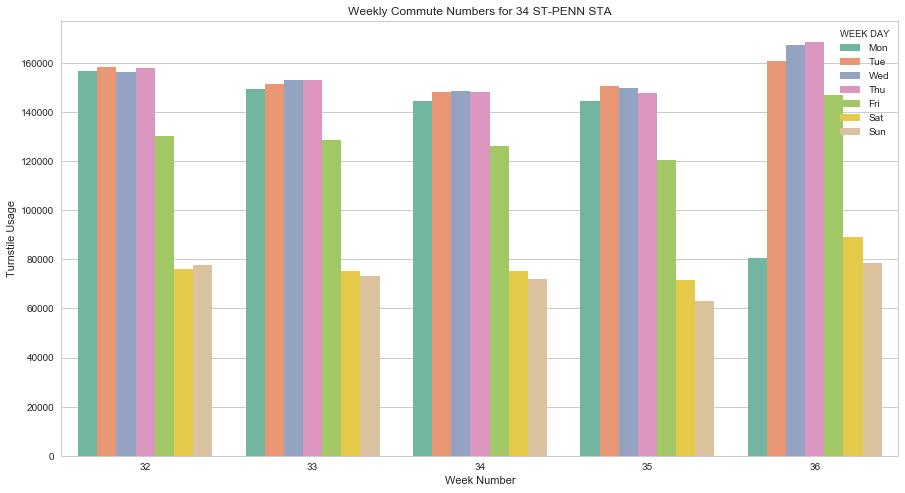

In [27]:
#plot week number to entries, split by week day
plt.figure(figsize=(15,8))
sns.barplot(x='WEEK NUMBER', y='DELTA ENTRIES',data=df8d[2:37], hue='WEEK DAY', palette='Set2')
plt.title('Weekly Commute Numbers for 34 ST-PENN STA') 
plt.xlabel('Week Number')
plt.ylabel('Turnstile Usage')

### Challenge 9

In [28]:
#create new dataframe grouped by station and sum
df9 = df8c \
.groupby('STATION').sum() \
.drop(['ENTRIES','EXITS'], axis=1)

In [29]:
df9.sort_values(by='DELTA ENTRIES',ascending=False).head()

,DELTA ENTRIES,DELTA EXITS
STATION,,
34 ST-PENN STA,5389445.0,4681698.0
GRD CNTRL-42 ST,4821963.0,4459028.0
34 ST-HERALD SQ,3836626.0,3635874.0
23 ST,3702950.0,2727866.0
14 ST-UNION SQ,3697208.0,3234637.0


### Challenge 10

In [30]:
df10 = df9.reset_index()

In [31]:
#create new data frame with top 20 stations for total entries
df10b = df10.sort_values('DELTA ENTRIES',ascending=False).head(20)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

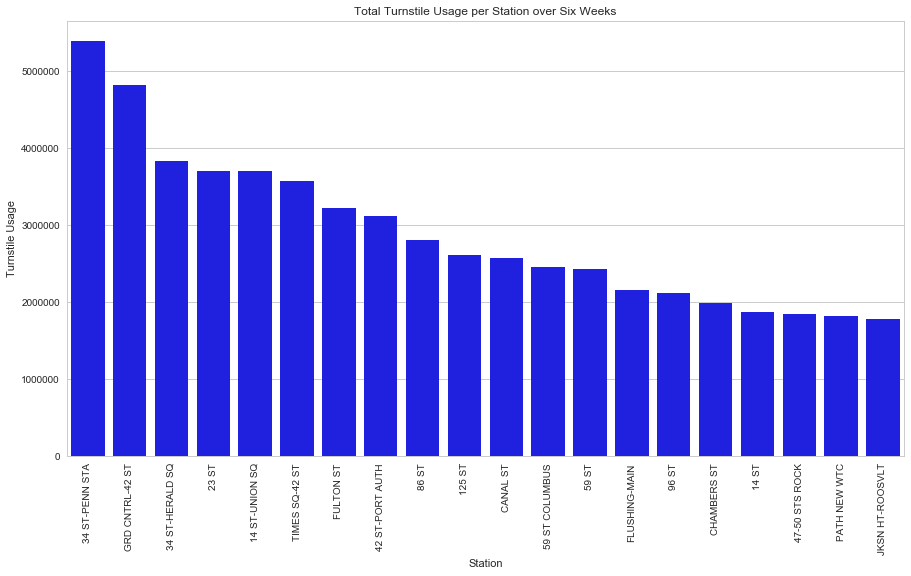

In [32]:
#plot stations and their total entries for six weeks
plt.figure(figsize=(15,8))
sns.barplot(x='STATION',y='DELTA ENTRIES',data=df10b, color='blue')
plt.title('Total Turnstile Usage per Station over Six Weeks') 
plt.xlabel('Station')
plt.ylabel('Turnstile Usage')

plt.xticks(rotation=90)

**TA COMMENT:**

Good job on the challenge! Your code is pretty easy to follow and your handle on python is good too. I left a few comments throughout the notebook for you to review. The only general comment I have is to use helper functions when you find yourself repeating code.